In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

In [6]:
(beta1, beta2_values, M, n_train, n_test, seed, epsilon,
           x, x_train, x_test, epsilon_train, epsilon_test,
           liste_y, liste_y_train, liste_y_test)  = dgp.data_gen_process()

NameError: name 'np' is not defined

In [ ]:
def models_fit(): # Following the experiment

    coefs_A = []
    coefs_B = []
    erreurs_A = []
    erreurs_B = []

    for beta2 in beta2_values:
        y_train = beta1 * x_train + beta2 * x_train**2 + epsilon_train
        y_test = beta1 * x_test + beta2 * x_test**2 + epsilon_test

        # Linear Model : A
        model_a = LinearRegression().fit(x_train.reshape(-1, 1), y_train)
        y_pred_a = model_a.predict(x_test.reshape(-1, 1))
        pa = (y_test - y_pred_a)**2

        coef_a = model_a.coef_[0]
        intercept_a = model_a.intercept_

        # Quadratic Model : B
        x_train_quad = np.column_stack((x_train, x_train**2))
        x_test_quad = np.column_stack((x_test, x_test**2))

        model_b = LinearRegression().fit(x_train_quad, y_train)
        y_pred_b = model_b.predict(x_test_quad)
        pb = (y_test - y_pred_b)**2

        coef_b = model_b.coef_
        intercept_b = model_b.intercept_

        coefs_A.append([intercept_a, coef_a])
        coefs_B.append([intercept_b, coef_b])

        erreurs_A.append(pa)
        erreurs_B.append(pb)

    return coefs_A, coefs_B, erreurs_A, erreurs_B

coefs_A, coefs_B, erreurs_A, erreurs_B = models_fit()


def linear_model(x, coef):
    intercept, slope = coef
    return intercept + slope * x

def quadratic_model(x, coef):
    intercept, (slope1, slope2) = coef
    return intercept + slope1 * x + slope2 * x**2

def models_generation():

   modeles_A = []
   modeles_B = []
   x_continuous = np.linspace(0,5,1000)
   for coef in coefs_A:
       y_pred_a = linear_model(x_continuous, coef)
       modeles_A.append(y_pred_a)

   for coef in coefs_B:
       y_pred_b = quadratic_model(x_continuous, coef)
       modeles_B.append(y_pred_b)

   return modeles_A, modeles_B

modeles_A, modeles_B = models_generation()

In [ ]:
def plot_fits():

  modeles_A, modeles_B = models_generation()
  x_continuous = np.linspace(0,5,1000)

  for i, (modele_A, modele_B, y, beta2) in enumerate(zip(modeles_A, modeles_B, liste_y, beta2_values)):

    plt.figure()
    plt.title(f"Comparaison des fits des modèles pour beta2 = {beta2}")
    plt.plot(x[np.argsort(x)], y[np.argsort(x)], label = "modèle réel", color = "g")
    plt.plot(x_continuous, modele_A, label = "modèle linéaire", color = "r")
    plt.plot(x_continuous, modele_B, label = "modèle quadratique", color = "orange")
    plt.grid()
    plt.legend()
    plt.plot()



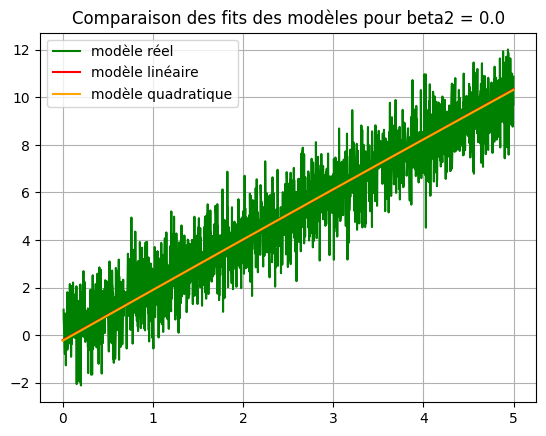

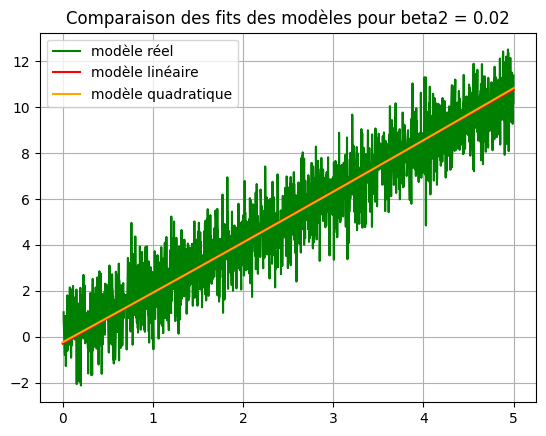

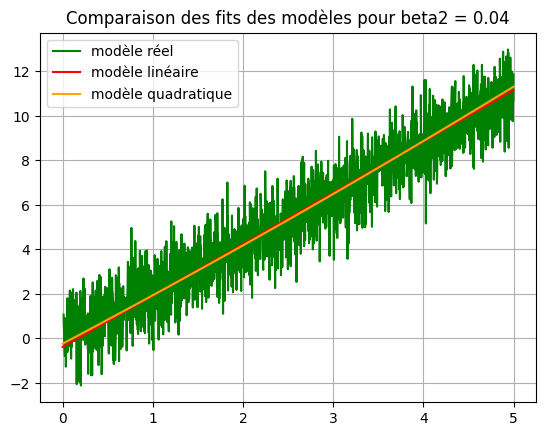

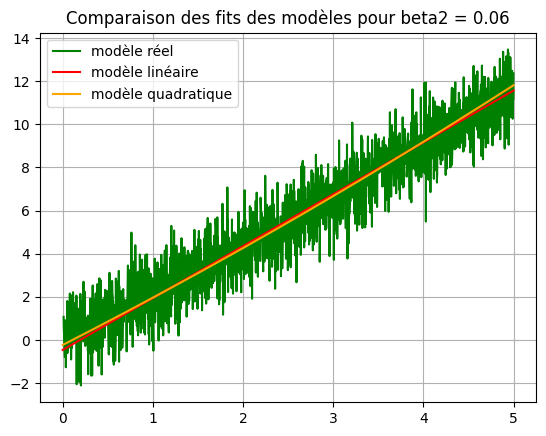

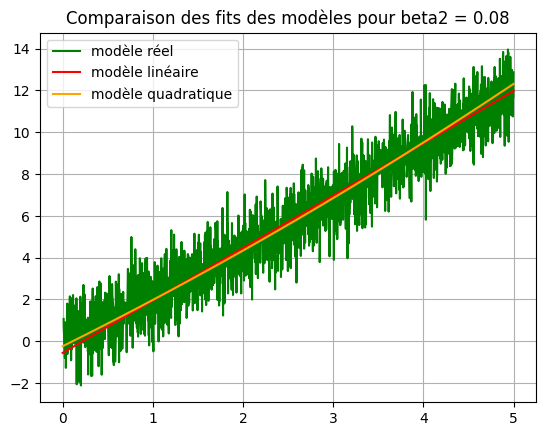

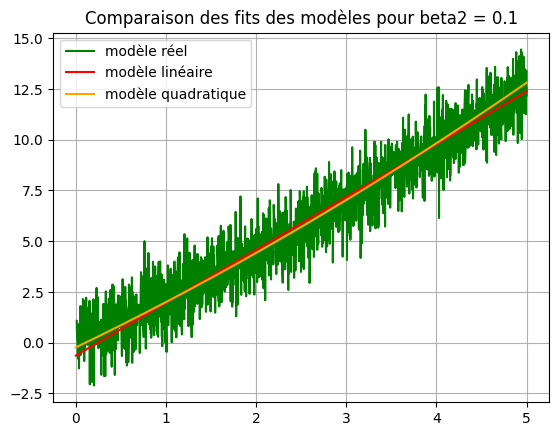

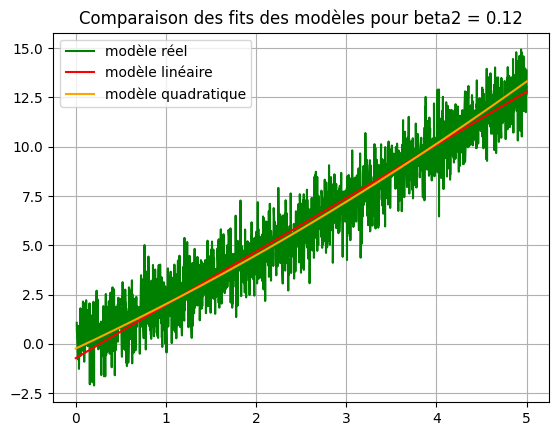

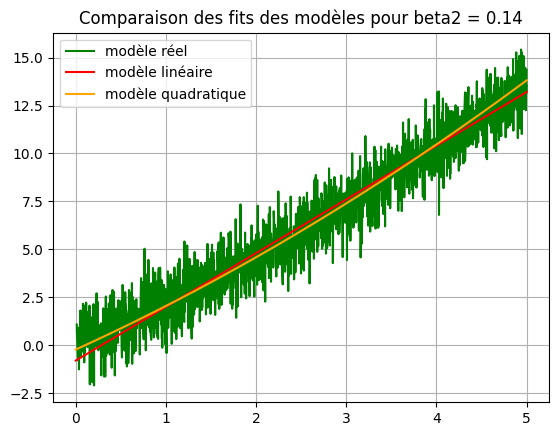

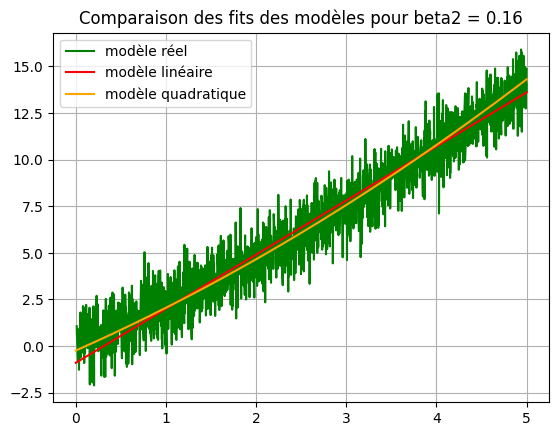

In [ ]:
plot_fits()